# Ed-Tech Platform Analytics: User Engagement and Performance Analysis

## Introduction

This notebook presents a comprehensive analysis of an educational technology platform's user data. 
The dataset contains information about student behavior, engagement patterns, academic performance, and conversion metrics across different regions and demographics.

### Dataset Overview
The dataset includes **124517 records** spanning from **Apr 2020 - Sept 2020** and contains the following key metrics:
- **User Demographics**: Region, city type, job field
- **Engagement Metrics**: Homework completion, additional homework, desktop usage
- **Performance Data**: Average scores, task class levels
- **Conversion Funnel**: Trial appointments, first payments, paywall conversion
- **User Feedback**: NPS scores
- **Technical Data**: Operating system preferences

### Business Objectives
This analysis aims to:
1. Understand user engagement patterns and their impact on learning outcomes
2. Identify factors that drive student success and platform retention
3. Analyze conversion funnel performance from trial to paid users
4. Explore regional and demographic differences in platform usage
5. Provide data-driven recommendations for product and marketing strategies

### 1. Data Import and Overview
- Import required libraries (pandas, numpy, matplotlib, seaborn)
- Load ed-tech dataset
- Display basic dataset statistics (shape, size)
- Examine data structure and column types
- Explore summary statistics

In [46]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Read the file
ed_data = pd.read_csv('edtech_data.csv')
ed_data.head(5)

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
0,2989400374e8abf2c4ac8921531cd1c0,92cc220d5171deb66e947d5b4ffce8bd,NaN,NaN,Android,NaN,NaN,6.0,80.222222,9,False,Unknown,True,NaN,0,2020-09-14 13:29,2020-04-22 09:48,NaN,True
1,c8bce51779d3f746baaf2f59ddef69cd,80cf7575a4dc3a3a8cb30e3262d23e19,NaN,NaN,Windows,I am doing now,IT,11.0,98.250000,4,False,Unknown,True,NaN,0,2020-07-16 15:03,2020-04-24 17:29,NaN,True
2,a6bad682ac10999865570bee0e11b9f6,3b671290e690217ce17052c9c52afa31,NaN,NaN,Android,No,NaN,5.0,68.000000,1,False,Unknown,True,NaN,0,2020-08-25 10:03,2020-04-15 10:10,NaN,True
3,b85c31b416b405dd9b9498bdde703f4e,03e4d2186bc5231cd7f302ac76e1de76,NaN,NaN,iOS,NaN,NaN,7.0,78.571429,7,False,Unknown,True,NaN,0,2020-08-13 14:41,2020-04-28 14:04,NaN,True
4,93c44d3b5d850f60ada1faf9db83b7f7,ec8a79f01156b3c82a27ca947f49d319,NaN,NaN,Android,No,Finance,6.0,92.000000,4,False,Unknown,True,NaN,0,2020-08-27 13:23,2020-04-28 11:26,NaN,True


In [8]:
ed_data.shape

(124517, 19)

In [10]:
ed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124517 entries, 0 to 124516
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   client_id                     124517 non-null  object 
 1   user_id                       124517 non-null  object 
 2   first_trial_appointment_date  20657 non-null   object 
 3   first_payment_date            921 non-null     object 
 4   os                            124501 non-null  object 
 5   tutor                         48697 non-null   object 
 6   job                           38608 non-null   object 
 7   task_class                    123212 non-null  float64
 8   average_score                 121500 non-null  float64
 9   homework_done                 124517 non-null  int64  
 10  paywall_paid                  124517 non-null  bool   
 11  school_name                   124517 non-null  object 
 12  desktop_enter                 124517 non-nul

In [12]:
ed_data.describe(include='all')

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
count,124517,124517,20657,921,124501,48697,38608,123212.000000,121500.000000,124517.000000,124517,124517,124517,275.000000,124517.000000,124517,124517,12142,124517
unique,119388,118564,14012,914,7,3,5,NaN,NaN,NaN,2,1077,2,NaN,NaN,15356,39957,33,2
top,74954c25d89b941a81d13a5dae2d107a,a50c40181b4440bbd2b5c76223c0f4cd,2020-08-31 13:56,2020-08-13 18:13,iOS,Earlier,Finance,NaN,NaN,NaN,False,Unknown,True,NaN,NaN,2020-08-19 08:02,2020-05-12 10:01,Moscow,True
freq,4,7,8,2,56055,19936,11440,NaN,NaN,NaN,124508,121794,103039,NaN,NaN,442,23,4462,102774
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.756834,77.226118,3.513962,NaN,NaN,NaN,6.803636,0.127204,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.733687,19.204706,10.350490,NaN,NaN,NaN,3.764702,9.483324,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,68.000000,1.000000,NaN,NaN,NaN,2.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,82.000000,2.000000,NaN,NaN,NaN,9.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,91.500000,4.000000,NaN,NaN,NaN,10.000000,0.000000,NaN,NaN,NaN,NaN


#### 2. Data Preprocessing
- Format date and boolean columns
- fill na with 'Unknown'
- Remove duplicates
- Deduplicate redundant rows by keeping the most recent dates and maximum values per user

In [14]:
bool_cols = ['paywall_paid','desktop_enter','is_big_city']

for col in bool_cols:
    ed_data[col] = ed_data[col].astype(int)

In [16]:
date_cols = ['first_trial_appointment_date','first_payment_date','first_visit_date','call_date']

for col in date_cols:
    ed_data[col] = pd.to_datetime(ed_data[col])

In [18]:
fill_cols = ['os', 'job', 'tutor','region']
ed_data[fill_cols] = ed_data[fill_cols].fillna('Unknown')

In [20]:
ed_data.duplicated().sum()

79

In [22]:
ed_data[ed_data.duplicated()].head(5)

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
16674,476eb8249fe57fcf568969aae59188c9,386bc96a4cb16573c0d5dab664f5fb44,2020-08-12 13:26:00,NaT,iOS,Unknown,Unknown,5.0,96.0,2,0,Unknown,1,NaN,0,2020-08-07 17:53:00,2020-05-21 12:36:00,Unknown,0
22136,288995175d4599ee044323f01bb54189,40c8319f081132770db89e256b323989,2020-08-28 12:38:00,NaT,iOS,No,Unknown,7.0,96.5,6,0,Unknown,1,NaN,0,2020-08-27 11:29:00,2020-04-30 12:56:00,Unknown,1
24588,5f4bf445ad4b42101b76ccb8a10797cd,1cc3910e5abcc3ccedeb36833cd561de,2020-09-08 14:40:00,NaT,iOS,Unknown,Unknown,8.0,59.0,1,0,Unknown,1,NaN,0,2020-08-17 15:30:00,2020-04-20 10:36:00,Unknown,0
29460,7d8de1c1a897dfe859d86e58fdb7f9da,fbede96855640b9544acbadaee2d7505,2020-09-07 10:59:00,NaT,Windows,Earlier,Finance,6.0,90.2,5,0,Unknown,1,NaN,0,2020-09-07 10:55:00,2020-04-23 12:21:00,Unknown,0
32324,38a0a0142e0a32fe622adaf7529492d5,3b5f402ca2efaf44cd9d7f2b608c32dc,2020-08-14 13:04:00,NaT,iOS,Unknown,Unknown,7.0,98.0,1,0,Unknown,1,NaN,0,2020-08-13 11:23:00,2020-04-27 14:02:00,Unknown,1


In [24]:
# Pick one client_id from your results and See ALL occurrences of this client
test_id = '5f4bf445ad4b42101b76ccb8a10797cd' 
ed_data[ed_data['client_id'] == test_id]

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
2941,5f4bf445ad4b42101b76ccb8a10797cd,1cc3910e5abcc3ccedeb36833cd561de,2020-09-08 14:40:00,NaT,iOS,Unknown,Unknown,8.0,59.0,1,0,Unknown,1,NaN,0,2020-08-17 15:30:00,2020-04-20 10:36:00,Unknown,0
24588,5f4bf445ad4b42101b76ccb8a10797cd,1cc3910e5abcc3ccedeb36833cd561de,2020-09-08 14:40:00,NaT,iOS,Unknown,Unknown,8.0,59.0,1,0,Unknown,1,NaN,0,2020-08-17 15:30:00,2020-04-20 10:36:00,Unknown,0


In [26]:
ed_data_clean = ed_data.drop_duplicates()
print(f"Rows before removing duplicates: {len(ed_data)}")
print(f"Rows after removing duplicates: {len(ed_data_clean)}")

Rows before removing duplicates: 124517
Rows after removing duplicates: 124438


#### 2.1 Deduplication

In [28]:
ed_data_clean_ = ed_data_clean.groupby('user_id').agg('count').reset_index()[['user_id','client_id']]
ed_data_clean_[ed_data_clean_['client_id']>1]

,user_id,client_id
15,000796759b25145e0dcb8a0fad33d801,2
48,001b9da631dbcb7ac11a525a48a61aa6,2
122,004626f806f715350ea69fd9b50787bf,2
182,00674f08b030c10c0230181f0ab31322,2
184,00681a66c283aaffa74a15e4c330aa54,2
...,...,...
118420,ffad160245d011e860b8d2576d06a7a1,2
118431,ffb55e90bf0cf0e488aebe1a52ec6951,2
118487,ffd11da36a941f0fddd6460bbfa77ca1,2
118522,ffe44f7ebf595b0abe745f672f7851e7,2


In [30]:
ed_data_clean[ed_data_clean['user_id'] == '001b9da631dbcb7ac11a525a48a61aa6']

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
790,31ab3c515d53046b8caff4502a68c9f7,001b9da631dbcb7ac11a525a48a61aa6,NaT,NaT,Windows,Unknown,Unknown,5.0,48.0,1,0,Unknown,1,NaN,0,2020-09-09 13:12:00,2020-04-30 14:15:00,Unknown,1
99270,31ab3c515d53046b8caff4502a68c9f7,001b9da631dbcb7ac11a525a48a61aa6,2020-09-11 16:54:00,NaT,Windows,Unknown,Unknown,5.0,48.0,1,0,Unknown,1,NaN,0,2020-09-09 13:12:00,2020-04-30 14:15:00,Unknown,1


In [32]:
ed_data_clean[ed_data_clean['user_id'] == 'ffe44f7ebf595b0abe745f672f7851e7']

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
44792,c293a0481d09e6fac8a22e9f1bdeef7d,ffe44f7ebf595b0abe745f672f7851e7,2020-09-14 19:09:00,NaT,Android,Unknown,Unknown,7.0,92.5,2,0,Unknown,0,NaN,0,2020-09-09 12:45:00,2020-04-28 08:37:00,Unknown,1
54768,c293a0481d09e6fac8a22e9f1bdeef7d,ffe44f7ebf595b0abe745f672f7851e7,NaT,NaT,Android,Unknown,Unknown,7.0,92.5,2,0,Unknown,0,NaN,0,2020-09-09 12:45:00,2020-04-28 08:37:00,Unknown,1


In [34]:
ed_data_clean[ed_data_clean['user_id'] == 'ffad160245d011e860b8d2576d06a7a1']

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
4814,f17a1cd3037402d9e783a53e62986f4f,ffad160245d011e860b8d2576d06a7a1,2020-06-26 11:57:00,NaT,iOS,I am doing now,Finance,6.0,83.333333,3,0,Unknown,0,NaN,0,2020-06-23 10:51:00,2020-05-08 10:17:00,Saint Petersburg,1
91574,f17a1cd3037402d9e783a53e62986f4f,ffad160245d011e860b8d2576d06a7a1,NaT,NaT,iOS,I am doing now,Finance,6.0,83.333333,3,0,Unknown,0,NaN,0,2020-06-23 10:51:00,2020-05-08 10:17:00,Saint Petersburg,1


In [36]:
# Deduplicate the data by keeping the most recent dates and maximum values
ed_data_clean_ = ed_data_clean.groupby('user_id').agg({
    'first_trial_appointment_date': np.max,
    'first_payment_date': np.max,
    'os': np.max,
    'tutor': np.max,
    'job': np.max,
    'task_class': np.max,
    'average_score': np.max,
    'homework_done': np.max,
    'paywall_paid': np.max,
    'school_name': np.max,
    'desktop_enter': np.max,
    'nps_score': np.max,
    'add_homework_done': np.max,
    'call_date': np.max,
    'first_visit_date': np.max,
    'region': np.max,
    'is_big_city': np.max,
}).reset_index()

In [38]:
ed_data_clean_[ed_data_clean_['user_id'] == 'ffad160245d011e860b8d2576d06a7a1']

,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
118420,ffad160245d011e860b8d2576d06a7a1,2020-06-26 11:57:00,NaT,iOS,I am doing now,Finance,6.0,83.333333,3,0,Unknown,0,NaN,0,2020-06-23 10:51:00,2020-05-08 10:17:00,Saint Petersburg,1


In [40]:
ed_data_clean = ed_data_clean_
del ed_data_clean_
gc.collect();

In [42]:
ed_data_clean.shape
ed_data_clean.columns

Index(['user_id', 'first_trial_appointment_date', 'first_payment_date', 'os',
       'tutor', 'job', 'task_class', 'average_score', 'homework_done',
       'paywall_paid', 'school_name', 'desktop_enter', 'nps_score',
       'add_homework_done', 'call_date', 'first_visit_date', 'region',
       'is_big_city'],
      dtype='object')

### 3. EDA
1. Visualize correlation matrix
2. Group the scores and tasks by `is_big_city`, `Region`, `OS`, and `Job`
3. Explore relationship between homework and average score
4. Explore relationship between NPS and average score

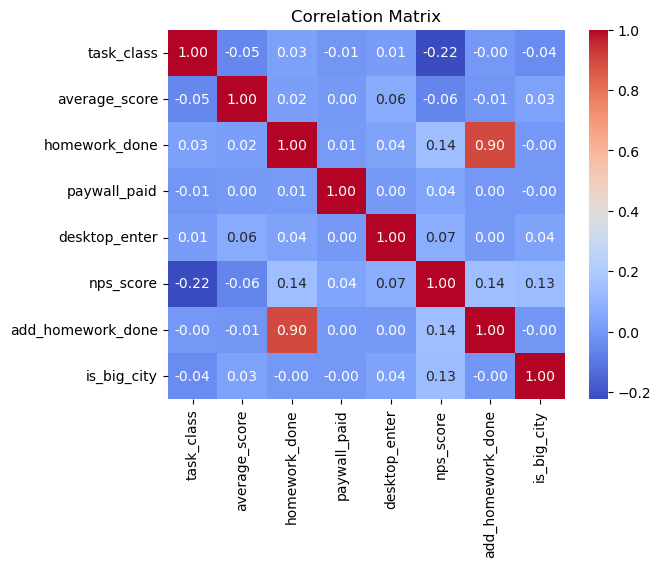

In [50]:
numeric_cols = ed_data_clean.select_dtypes(include=['number'])
df_corr = numeric_cols.corr()
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [52]:
ed_data_clean.groupby('is_big_city').agg({
    'user_id': ['count'],
    'task_class': [np.mean],
    'average_score': [np.mean],
    'homework_done': [np.mean],
    'nps_score': [np.mean],
    'add_homework_done': [np.mean]
}).round(2)

,user_id,task_class,average_score,homework_done,nps_score,add_homework_done
,count,mean,mean,mean,mean,mean
is_big_city,,,,,,
0,19623,6.92,75.76,3.51,5.31,0.18
1,98941,6.74,77.51,3.47,6.96,0.09


In [54]:
ed_data_clean.groupby('os').agg({
    'user_id': ['count'],
    'task_class': [np.mean],
    'average_score': [np.mean],
    'homework_done': [np.mean],
    'nps_score': [np.mean],
    'add_homework_done': [np.mean]
}).round(2)

,user_id,task_class,average_score,homework_done,nps_score,add_homework_done
,count,mean,mean,mean,mean,mean
os,,,,,,
Android,42476,6.66,76.73,3.65,6.79,0.11
Linux,44,6.56,72.91,3.59,NaN,0.16
Mac OS,1035,6.65,81.15,3.48,1.00,0.26
Solaris,1,5.00,95.50,2.00,NaN,0.00
Ubuntu,12,7.17,87.14,2.25,NaN,0.00
Unknown,15,7.00,78.49,1.13,NaN,0.00
Windows,22244,6.77,78.91,3.21,6.76,0.09
iOS,52737,6.86,76.83,3.45,6.86,0.11


In [56]:
ed_data_clean.groupby('job').agg({
    'user_id': ['count'],
    'task_class': [np.mean],
    'average_score': [np.mean],
    'homework_done': [np.mean],
    'nps_score': [np.mean],
    'add_homework_done': [np.mean]
}).round(2)

,user_id,task_class,average_score,homework_done,nps_score,add_homework_done
,count,mean,mean,mean,mean,mean
job,,,,,,
Education,7150,7.15,76.02,3.79,7.00,0.07
Finance,10680,7.16,77.34,4.07,6.00,0.30
IT,6374,6.96,80.02,3.82,5.79,0.13
Medicine,8513,6.83,77.05,3.95,7.45,0.18
Science,3278,7.09,79.20,3.78,7.75,0.08
Unknown,82569,6.65,77.04,3.29,6.84,0.08


In [58]:
ed_data_clean.groupby('region').agg({
    'user_id': ['count'],
    'task_class': [np.mean],
    'average_score': [np.mean],
    'homework_done': [np.mean],
    'nps_score': [np.mean],
    'add_homework_done': [np.mean],
    'desktop_enter': ['sum']
}).round(2)

,user_id,task_class,average_score,homework_done,nps_score,add_homework_done,desktop_enter
,count,mean,mean,mean,mean,mean,sum
region,,,,,,,
Amur Region,1,5.00,95.10,10.00,NaN,0.00,1
Astrakhan Region,1,9.00,81.00,1.00,NaN,0.00,1
Chelyabinsk Region,182,7.43,73.97,3.07,10.00,0.04,162
Chuvash Republic,1,9.00,95.00,3.00,NaN,0.00,1
Kaliningrad Region,1,11.00,91.14,8.00,NaN,0.00,1
Kemerovo Region,2,8.00,86.43,11.50,NaN,0.00,1
Krasnodar Territory,19,6.68,70.89,122.84,NaN,118.00,17
Krasnoyarsk Territory,356,7.06,75.20,3.24,7.00,0.10,287


#### Summary
- Majority of the users are from big cities such as Moscow, Saint Petersburg, and Sverdlovsk Region
- Most commonly used operating systems are Windows, iOS, followed by Android
- There is no clear domination in the job field, though Finance and Medicine have more users
- Average scores vary significantly by region:
  - **High scores**: Republic of Mordovia, Chuvash Republic, Amur Region
  - **Low scores**: Ulyanovsk Region, Primorye Territory, Orenburg Region

<function matplotlib.pyplot.show(close=None, block=None)>

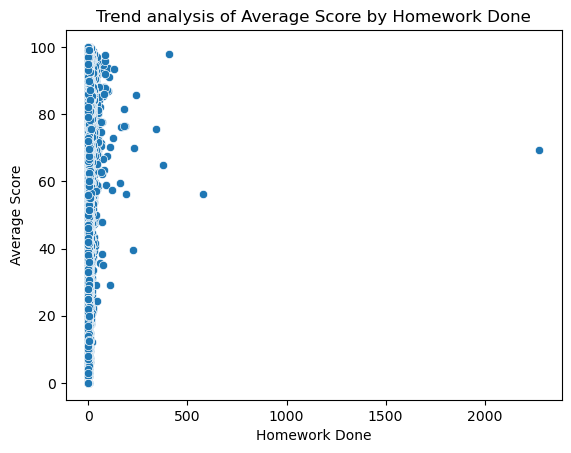

In [60]:
import seaborn as sns
sns.scatterplot(data = ed_data_clean, x='homework_done',y='average_score')
plt.title('Trend analysis of Average Score by Homework Done')
plt.xlabel('Homework Done')
plt.ylabel('Average Score')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

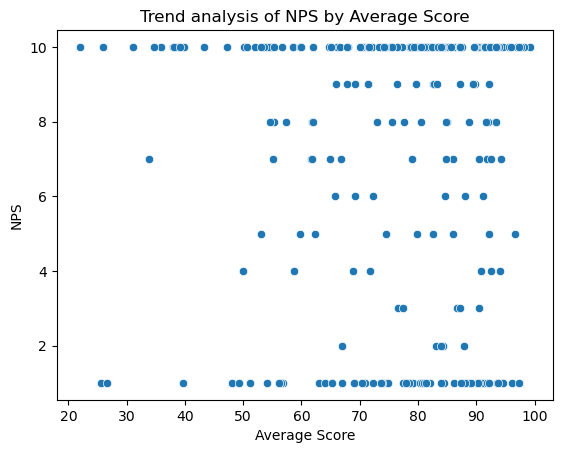

In [62]:
import seaborn as sns
sns.scatterplot(data = ed_data_clean, x='average_score',y='nps_score')
plt.title('Trend analysis of NPS by Average Score')
plt.xlabel('Average Score')
plt.ylabel('NPS')
plt.show

#### Summary
- There is no correlation between average score and homework done
- There is no correlation between NPS score and average score

Hence, we can infer that Homework completion does not predict academic performance, suggesting other factors drive success

In [64]:
ed_data_clean.columns

Index(['user_id', 'first_trial_appointment_date', 'first_payment_date', 'os',
       'tutor', 'job', 'task_class', 'average_score', 'homework_done',
       'paywall_paid', 'school_name', 'desktop_enter', 'nps_score',
       'add_homework_done', 'call_date', 'first_visit_date', 'region',
       'is_big_city'],
      dtype='object')

### 3.1 Analyze conversion funnel performance from trial to paid users

In [66]:
# convert date columns
date_cols = ['first_trial_appointment_date', 'first_payment_date',
    'first_visit_date'    
]
for col in date_cols:
    ed_data_clean[col] = pd.to_datetime(ed_data_clean[col], errors='coerce')

In [70]:
# Extract positive values
ed_data_clean['has_visit'] = ed_data_clean['first_visit_date'].notna()
ed_data_clean['has_trial'] = ed_data_clean['first_trial_appointment_date'].notna()
ed_data_clean['has_paid'] = (ed_data_clean['paywall_paid'] == 1) | ed_data_clean['first_payment_date'].notna()

In [74]:
# Create funnel counts
overall_funnel = pd.DataFrame({
    'stage': ['Visit', 'Trial', 'Paid'],
    'users': [
        ed_data_clean['has_visit'].sum(),
        ed_data_clean['has_trial'].sum(),
        ed_data_clean['has_paid'].sum()
    ]
})

In [78]:
# Calculate conversion rates
overall_funnel['conversion_from_previous'] = (
    overall_funnel['users'] / overall_funnel['users'].shift(1)
).round(2)

overall_funnel.loc[0, 'conversion_from_previous'] = None
overall_funnel

,stage,users,conversion_from_previous
0,Visit,118564,NaN
1,Trial,19247,0.16
2,Paid,912,0.05


In [88]:
# compute funnel counts by segment OS
device_funnel = (
    ed_data_clean
    .groupby('os')
    .agg(
        visits=('has_visit', 'sum'),
        trials=('has_trial', 'sum'),
        paid=('has_paid', 'sum')
    )
    .reset_index()
)

In [100]:
device_funnel['visit_to_trial'] = (device_funnel['trials'] / device_funnel['visits']).round(2)
device_funnel['trial_to_paid'] = (device_funnel['paid'] / device_funnel['trials']).round(2)
device_funnel['visit_to_paid'] = (device_funnel['paid'] / device_funnel['visits']).round(2)

device_funnel.sort_values(by='visits',ascending=False)

,os,visits,trials,paid,visit_to_trial,trial_to_paid,visit_to_paid
7,iOS,52737,8598,410,0.16,0.05,0.01
0,Android,42476,6744,311,0.16,0.05,0.01
6,Windows,22244,3744,174,0.17,0.05,0.01
2,Mac OS,1035,147,15,0.14,0.10,0.01
1,Linux,44,9,1,0.20,0.11,0.02
5,Unknown,15,2,0,0.13,0.00,0.00
4,Ubuntu,12,3,1,0.25,0.33,0.08
3,Solaris,1,0,0,0.00,NaN,0.00
